Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/codsoft/MovieRating/IMDb Movies India.csv", encoding='latin1')




In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [17]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [21]:
df = df[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3', 'Rating']]


In [22]:
print(df)

                 Genre            Director           Actor 1  \
0                Drama       J.S. Randhawa          Manmauji   
1                Drama       Gaurav Bakshi      Rasika Dugal   
2       Drama, Musical  Soumyajit Majumdar      Sayani Gupta   
3      Comedy, Romance          Ovais Khan           Prateik   
4                Drama        Amol Palekar      Rajat Kapoor   
...                ...                 ...               ...   
15504           Action       Mahendra Shah  Naseeruddin Shah   
15505    Action, Drama          Kuku Kohli      Akshay Kumar   
15506           Action          Kiran Thej   Sangeeta Tiwari   
15507           Action                 NaN               NaN   
15508    Action, Drama        K.C. Bokadia        Dharmendra   

                  Actor 2          Actor 3  Rating  
0                  Birbal  Rajendra Bhatia     NaN  
1          Vivek Ghamande    Arvind Jangid     7.0  
2       Plabita Borthakur       Roy Angana     NaN  
3              Ishi

In [6]:
df = df.dropna()

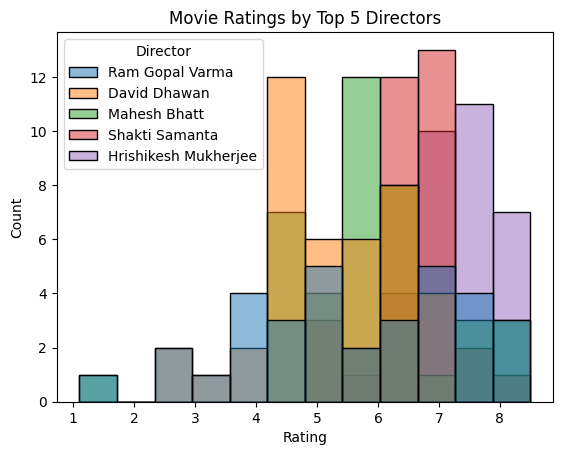

In [19]:
top_directors = df['Director'].value_counts().head(5).index
df_top = df[df['Director'].isin(top_directors)]

sns.histplot(x='Rating', hue='Director', data=df_top)
plt.title("Movie Ratings by Top 5 Directors")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

David Dhavan has the highest rating

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [31]:
X =  df[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
   
y = df['Rating']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [40]:

pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3'])],
        remainder='drop'
    ),
    LinearRegression()
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Sample Predictions:", y_pred[:5])  

Mean Squared Error: 4.561039624822129
Sample Predictions: [10.92044779  4.63368948  5.00342765  3.21484162  6.04820621]
